# Neural Network Project 3 – Eyes Classification

In [1]:
# Importing Libraries

import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img, img_to_array

# SVM 
from sklearn import svm
from sklearn.metrics import accuracy_score

#MLP
from keras.optimizers import Adam
from keras.models import Sequential
from keras.regularizers import l1_l2
from tensorflow.keras.layers import Dense, Flatten, Dropout

# CNN
from keras.layers import Dropout
from keras.callbacks import Callback, EarlyStopping
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Male eyes images and labelling
data = []
labels = []

count_male = 1
for file in os.listdir("C:/Users/aksha/Downloads/Neural_Network/Assignment 3/maleeyes"):
    file_path = os.path.join("C:/Users/aksha/Downloads/Neural_Network/Assignment 3/maleeyes/", file)
    data.append(file_path)
    labels.append("M")
    count_male+=1

In [3]:
# Loading Female eyes images and labelling
count_female = 1
for file in os.listdir("C:/Users/aksha/Downloads/Neural_Network/Assignment 3/femaleeyes"):
    file_path = os.path.join("C:/Users/aksha/Downloads/Neural_Network/Assignment 3/femaleeyes/", file)
    data.append(file_path)
    labels.append("F")
    count_female+=1

## Performing EDA

In [4]:
df = pd.DataFrame({"File_Path": data, "Label": labels})
df = df.sample(frac=1).reset_index(drop=True)
print("Shape of DataFrame: {}".format(df.shape))

Shape of DataFrame: (11525, 2)


In [5]:
# Count the male and female image counts
print ("Male Image counts: {}".format(count_male))
print("Female Image Counts: {}".format(count_female))

Male Image counts: 6324
Female Image Counts: 5203


In [6]:
print("DataFrame first 5: \n{}".format(df.head()))

DataFrame first 5: 
                                           File_Path Label
0  C:/Users/aksha/Downloads/Neural_Network/Assign...     F
1  C:/Users/aksha/Downloads/Neural_Network/Assign...     M
2  C:/Users/aksha/Downloads/Neural_Network/Assign...     F
3  C:/Users/aksha/Downloads/Neural_Network/Assign...     M
4  C:/Users/aksha/Downloads/Neural_Network/Assign...     F


## Visualizations

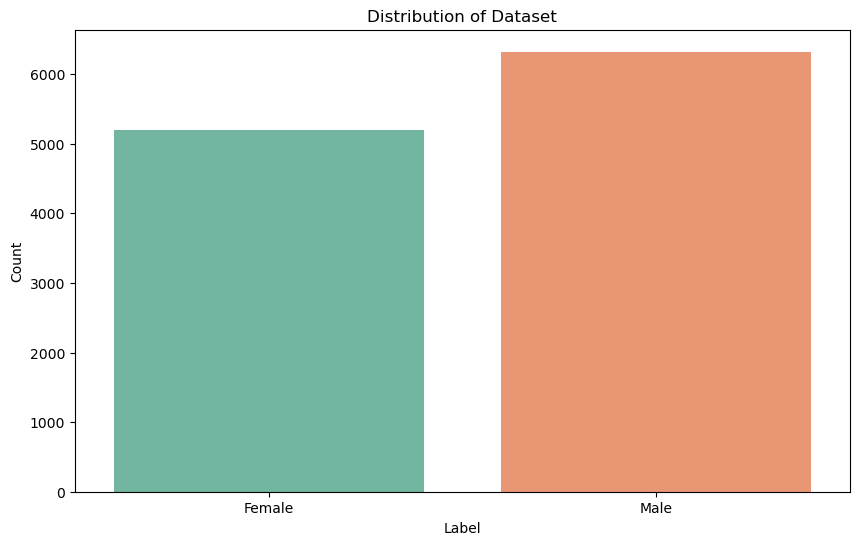

In [7]:
# Visualizing the Bar graph on how the data are represented 

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="Label", palette="Set2")
plt.title('Distribution of Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(['Male' if label == 'M' else 'Female' for label in labels])
plt.show()

## Observations

From the above graph it appears that there are more images representing male eyes than female eyes. This suggests that in the dataset used for the classification of eye problems, there is a slightly higher representation of male eyes. Male eyes have near to 6300 and Female eyes are near to 5200 data. 

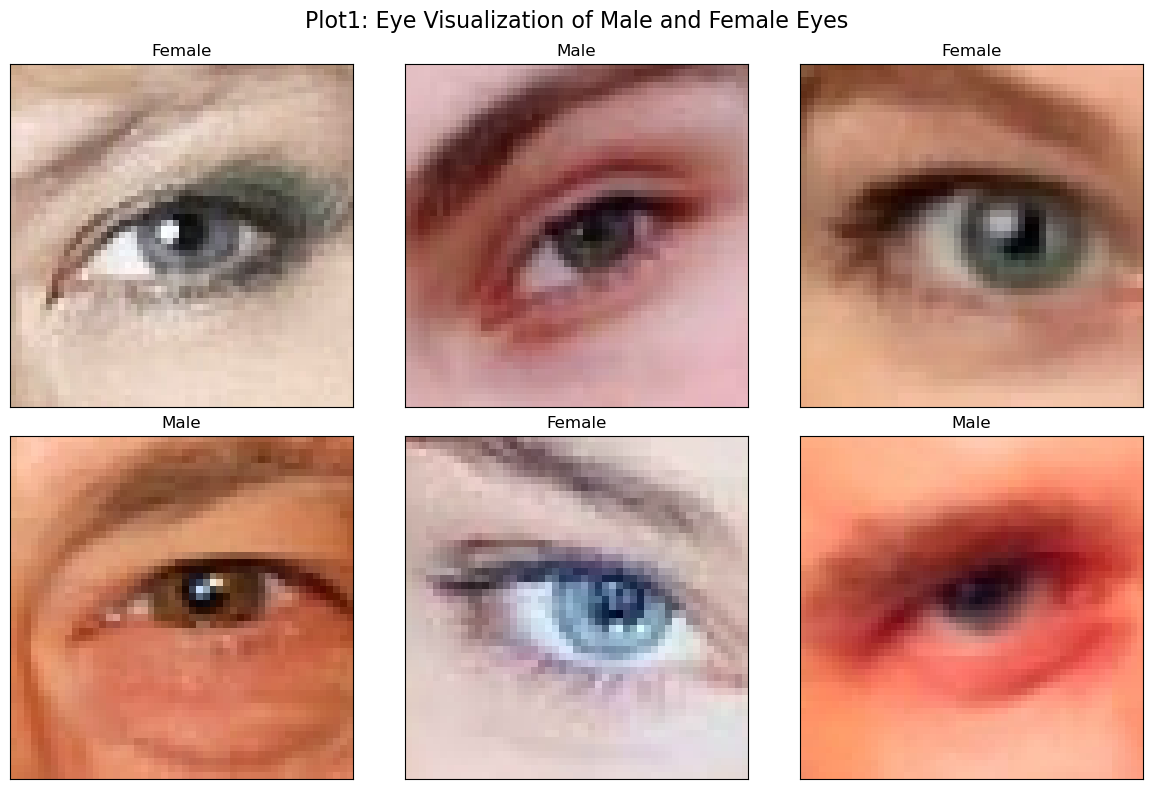

In [8]:
# Visualization of Male and Female Eyes

label_dict = {'M': 'Male', 'F': 'Female'}

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
fig.suptitle('Plot1: Eye Visualization of Male and Female Eyes', fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.File_Path[i]))
    ax.set_title(label_dict[df.Label[i]])
plt.tight_layout()
plt.show()

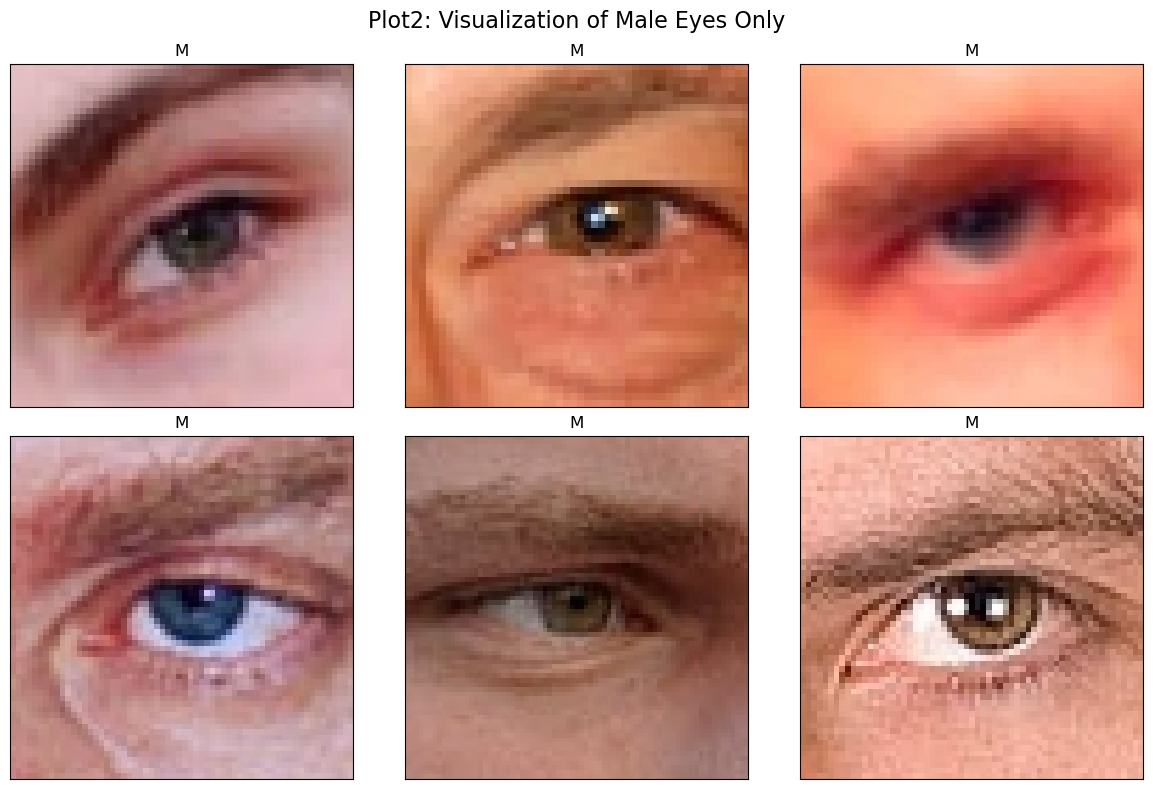

In [9]:
# Filter the DataFrame for female eyes
df_female = df[df['Label'] == 'M']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
fig.suptitle('Plot2: Visualization of Male Eyes Only', fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_female.File_Path.iloc[i]))
    ax.set_title(df_female.Label.iloc[i])
plt.tight_layout()
plt.show()

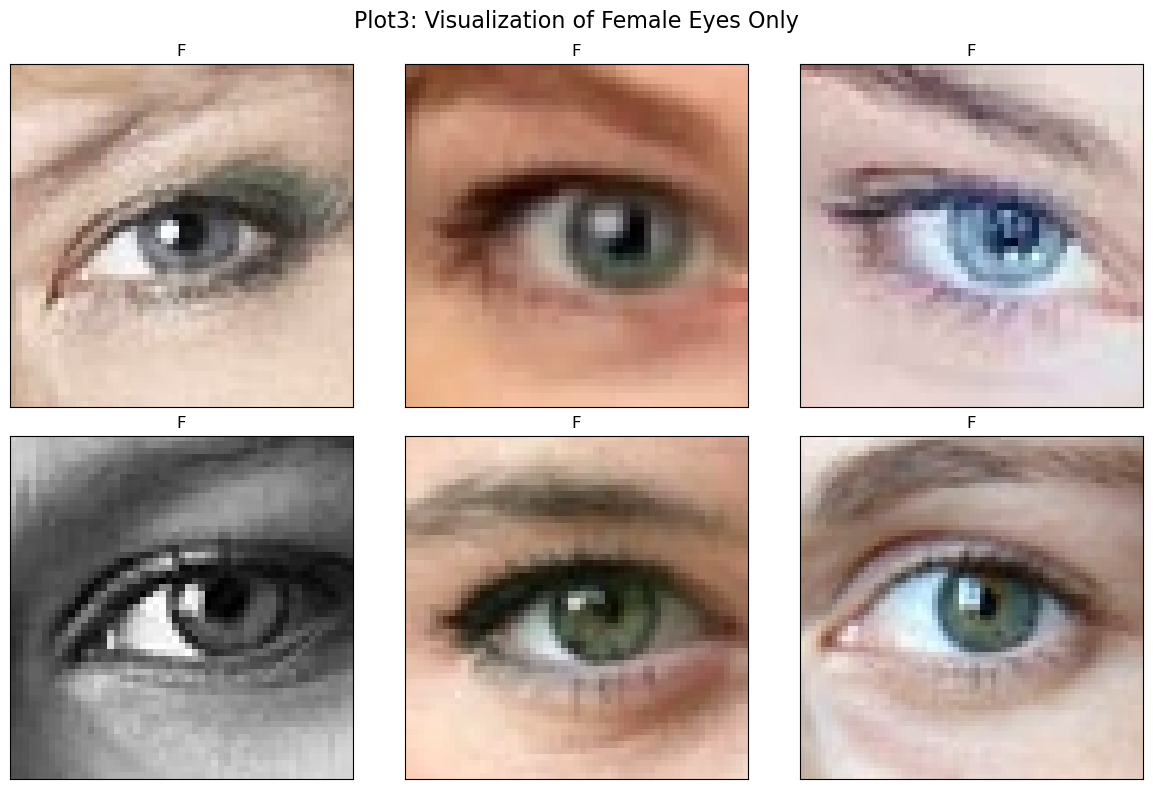

In [10]:
# Filter the DataFrame for female eyes
df_female = df[df['Label'] == 'F']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
fig.suptitle('Plot3: Visualization of Female Eyes Only', fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_female.File_Path.iloc[i]))
    ax.set_title(df_female.Label.iloc[i])
plt.tight_layout()
plt.show()

## Observations

Plot 1 provides a comprehensive visualization of the eye images from the dataframe, offering an overview of the entire dataset. Moving on to Plot 2, the focus narrows down to only the images of Male eyes, providing a detailed view of this specific category. Similarly, Plot 3 is dedicated to visualizing Female eyes, offering insights into this particular group. In addition to these observations, it’s important to note the potential implications of these visualizations.

## Preprocessing on the Images (Dataframe)

In [11]:
# Function to load and preprocess the image (Resizing, Array Conversion, and Normalizing)
def preprocess_image(path):
    img = load_img(path, target_size=(64, 64))
    img = img_to_array(img)
    img = img / 255.0
    return img

data = np.array([preprocess_image(path) for path in df['File_Path'].values])
labels = np.where(df['Label'].values == 'M', 1, 0)

## Train-Test Split 80:20

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

### Model 1: Support Vector Machine

In [13]:
# Flatten the image data
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Create a SVM Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model
clf.fit(X_train_flattened, y_train)

# Predict the response
y_pred_SVC = clf.predict(X_test_flattened)

# Model Accuracy
print("Accuracy of SVM:", accuracy_score(y_test, y_pred_SVC))

Accuracy of SVM: 0.8290672451193059


### Model 2: Multilayer Perceptron

In [14]:
# MLP model definition
model = Sequential()
model.add(Flatten(input_shape=(64, 64, 3)))
model.add(Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001))) 
model.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001))) 
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

# Early Stopping definition
early_stopping = EarlyStopping(monitor='val_loss', patience=5) # Increased patience

# Train the model
MLP_history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping])
MLP_y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy of MLP: %.2f' % (accuracy*100))

Epoch 1/100
116/116 [==============================] - 6s 48ms/step - loss: 8.1888 - accuracy: 0.5755 - val_loss: 2.1866 - val_accuracy: 0.7126
Epoch 2/100
116/116 [==============================] - 5s 46ms/step - loss: 1.9616 - accuracy: 0.6708 - val_loss: 1.7302 - val_accuracy: 0.7576
Epoch 3/100
116/116 [==============================] - 5s 47ms/step - loss: 1.5983 - accuracy: 0.7495 - val_loss: 1.4840 - val_accuracy: 0.7717
Epoch 4/100
116/116 [==============================] - 5s 47ms/step - loss: 1.4287 - accuracy: 0.7646 - val_loss: 1.7225 - val_accuracy: 0.6112
Epoch 5/100
116/116 [==============================] - 6s 48ms/step - loss: 1.3331 - accuracy: 0.7733 - val_loss: 1.2596 - val_accuracy: 0.7836
Epoch 6/100
116/116 [==============================] - 6s 48ms/step - loss: 1.2122 - accuracy: 0.7852 - val_loss: 1.2158 - val_accuracy: 0.8194
Epoch 7/100
116/116 [==============================] - 5s 47ms/step - loss: 1.1688 - accuracy: 0.7843 - val_loss: 1.3318 - val_accuracy:

## Model 3 - Convolution Neural Network

In [15]:
# CNN Model definition
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten()) 
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping definition
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
CNN_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stopping])
CNN_y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy CNN: %.2f' % (accuracy*100))

Epoch 1/100
289/289 [==============================] - 20s 68ms/step - loss: 0.5033 - accuracy: 0.7465 - val_loss: 0.3419 - val_accuracy: 0.8573
Epoch 2/100
289/289 [==============================] - 19s 66ms/step - loss: 0.3599 - accuracy: 0.8464 - val_loss: 0.2873 - val_accuracy: 0.8846
Epoch 3/100
289/289 [==============================] - 20s 68ms/step - loss: 0.3143 - accuracy: 0.8690 - val_loss: 0.2908 - val_accuracy: 0.8651
Epoch 4/100
289/289 [==============================] - 20s 69ms/step - loss: 0.2801 - accuracy: 0.8830 - val_loss: 0.2848 - val_accuracy: 0.8725
Epoch 5/100
289/289 [==============================] - 20s 68ms/step - loss: 0.2532 - accuracy: 0.8977 - val_loss: 0.2172 - val_accuracy: 0.9119
Epoch 6/100
289/289 [==============================] - 20s 70ms/step - loss: 0.2352 - accuracy: 0.9054 - val_loss: 0.2275 - val_accuracy: 0.9115
Epoch 7/100
289/289 [==============================] - 20s 69ms/step - loss: 0.2216 - accuracy: 0.9098 - val_loss: 0.2153 - val_ac

### State the intuition behind the architecture of the neural network

#### Model 2 - Multilayer Perceptron (MLP) Model

The Multi-Layer Perceptron model is a form of artificial neural network that is structured with a minimum of three layers of nodes. These include an input layer, a hidden layer, and an output layer. The Flatten layer in this model is responsible for transforming the 2D pixel matrix into a 1D array, which is then passed on to the dense layers. The Dense layers are fully interconnected, meaning each neuron is linked to every neuron in the preceding layer. These layers carry out the task of classifying the features that have been extracted by the previous layers. The model employs the ReLU activation function to incorporate non-linearity, enabling it to learn intricate patterns. To prevent overfitting, an L1/L2 regularizer is used, which adds a penalty to the loss function based on th
e magnitude of the weights. The Sigmoid activation function is utilized in the output layer for binary classification. The model is trained using the Adam optimizer, with the learning rate set to a small value to ensure gradual and consistent learning. Lastly, the Early Stopping callback is used to halt training once the validation loss ceases to improve, thereby preventing overfitting and conserving computational resources.

When dropout was used in this model, the performance reduced to resulting accuracy to approximately 50%.

#### Model 3 - Convolutional Neural Network (CNN) Model

The Convolutional Neural Network (CNN) model is specifically engineered to process grid-structured data, such as images.

The Conv2D layers in the model convolve the input with a set of learnable filters, each producing one feature map in the output. The MaxPooling2D layers are used to downsample the input by taking the maximum value over the window defined by pool_size for each dimension along the features axis. To prevent overfitting, Dropout layers are used, which randomly set a fraction of the input units to 0 during training. The Flatten layer is used to convert the 2D matrix of features into a 1D array, which can be fed into the dense layer. The Dense layer and sigmoid activation function are used for binary classification. The model is trained using the Adam optimizer. Lastly, the EarlyStopping callback is used to halt training once the validation loss ceases to improve.

In terms of accuracy, the CNN model performed better than the MLP model (90.15% vs 87.11%). This suggests that for this particular task, the spatial information in the images (which is captured by the CNN) is important for making accurate predictions.

### Hyperparameter usages for MLP and CNN

#### MLP:

**Flatten Layer:** This layer is used to convert the 2D matrix of pixels into a 1D array, which can be fed into the dense layers.<br>
**Dense Layers:** These are fully connected layers, where each neuron is connected to every neuron in the previous layer. They are used to perform classification on the features extracted by the preceding layers.<br>
**ReLU Activation Function:** This function introduces non-linearity into the model, allowing it to learn complex patterns.<br>
**L1/L2 Regularization:** This technique prevents overfitting by adding a penalty to the loss function based on the size of the weights.<br>
**Sigmoid Activation Function:** This function in the output layer is used for binary classification.<br>
**Adam Optimizer:** This optimizer is used for training the model, and the learning rate is set to a small value to ensure slow and steady learning.<br>
**Early Stopping:** This technique is used to stop training when the validation loss stops improving, preventing overfitting and saving computational resources.<br>

#### CNN:

**Conv2D Layers:** These layers are used to convolve the input with a set of learnable filters, each producing one feature map in the output.<br>
**MaxPooling2D Layers:** These layers are used to downsample the input by taking the maximum value over the window defined by pool_size for each dimension along the features axis.<br>
**Dropout Layers:** These layers are used to prevent overfitting by randomly setting a fraction of the input units to 0 during training.<br>
**Flatten Layer:** This layer is used to convert the 2D matrix of features into a 1D array, which can be fed into the dense layer.<br>
**Dense Layer:** This layer is used for binary classification.<br>
**Adam Optimizer:** This optimizer is used for training the model.<br>
**Early Stopping:** This technique is used to stop training when the validation loss stops improving.<br>

Techniques can be particularly useful because the data is likely to be high-dimensional with many different potential features from the eye images and there may be a risk of overfitting due to the complexity of the models being used. By using these techniques, we can ensure that our model generalizes well to unseen data and is robust to different variations in the images.

## Plot Training loss & Validation loss (MLP vs CNN)

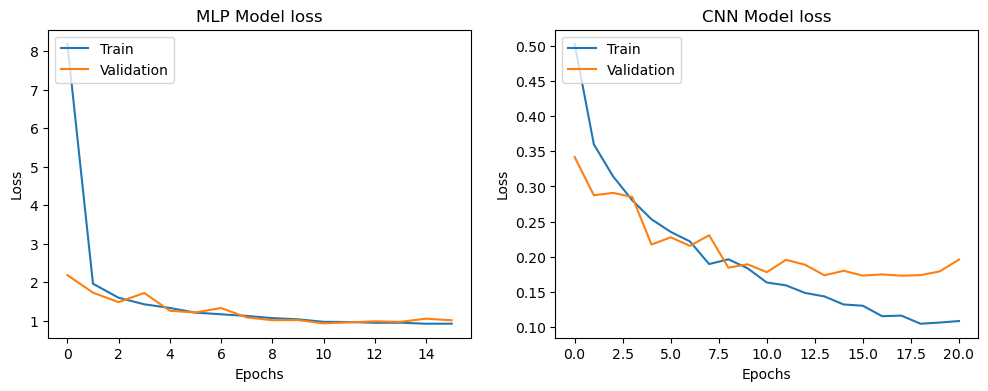

In [16]:
# Training & Validation Loss (MLP)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(MLP_history.history['loss'])
plt.plot(MLP_history.history['val_loss'])
plt.title('MLP Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')

# Training & Validation Loss (CNN)
plt.subplot(1, 2, 2)
plt.plot(CNN_history.history['loss'])
plt.plot(CNN_history.history['val_loss'])
plt.title('CNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Observations (MLP loss VS CNN loss)

**Multilayer Perceptron:** The loss for the MLP model starts off quite high and decreases sharply in the initial epochs. However, after this initial decrease, the loss seems to level off and doesn’t improve much in the later epochs.

**Convolution Neural Network:** The CNN model shows a steady decrease in loss over the course of the 20 epochs. The loss for the CNN model is significantly lower than the MLP model throughout the training process.

In summary, the CNN model appears to perform better than the MLP model in terms of loss over the 20 epochs.The CNN model had higher accuracy, precision, recall, and f1-score compared to the MLP model. This suggests that the CNN model is more effective for this particular task.

## Plot Training Accuracy & Validation Accuracy (MLP vs CNN)

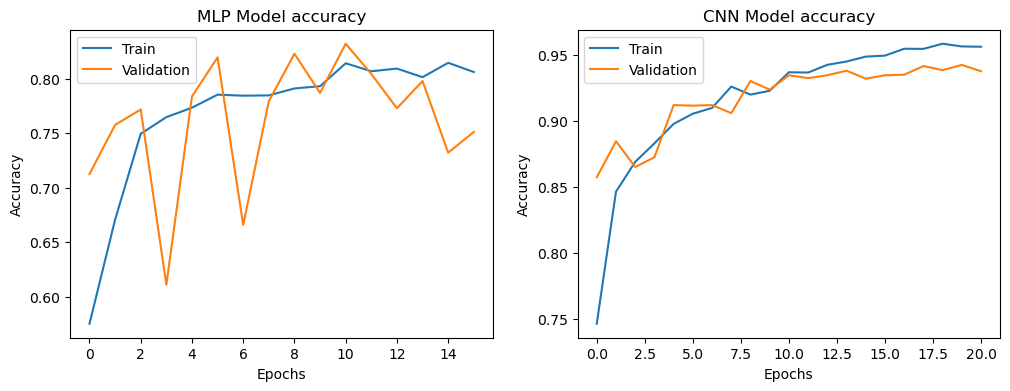

In [17]:
# Training & Validation Accuracy (MLP)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(MLP_history.history['accuracy'])
plt.plot(MLP_history.history['val_accuracy'])
plt.title('MLP Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')

# Training & Validation Accuracy (CNN)
plt.subplot(1, 2, 2)
plt.plot(CNN_history.history['accuracy'])
plt.plot(CNN_history.history['val_accuracy'])
plt.title('CNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Observations (MLP accuracy VS CNN accuracy)

**Multilayer Perceptron:** The accuracy for the MLP model starts off lower and increases over the epochs. However, there seems to be a gap between the training accuracy and the validation accuracy indicating some overfitting.

**Convolution Neural Network:** The CNN model shows a steady increase in accuracy over the epochs. The training accuracy and validation accuracy lines are closer together, indicating less overfitting compared to the MLP model.

In summary, the CNN model appears to perform better than the MLP model in terms of accuracy over the epochs. This observation aligns with the classification report and loss graph you provided earlier, where the CNN model had higher accuracy, precision, recall, and f1-score, and lower loss compared to the MLP model. This suggests that the CNN model is more effective for this particular task.

## Performance Metrics

In [18]:
# Printing the Classification Report of all 3 models (SVC, MLP, CNN) using Sklearn library

# Support Vector Classification (Report)
print("\n")
print("Support Vector Classification Report:")
print("------------------------------------")
print(classification_report(y_test, y_pred_SVC))
print("\n")

# Multilayer Perceptron (Report)
print("Multilayer Perceptron Classification Report:")
print("--------------------------------------------")
print(classification_report(y_test, MLP_y_pred))
print("\n")

# Convolution Neural Network (Report)
print("Convolution Neural Network Classification Report:")
print("-------------------------------------------------")
print(classification_report(y_test, CNN_y_pred))



Support Vector Classification Report:
------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       998
           1       0.85      0.85      0.85      1307

    accuracy                           0.83      2305
   macro avg       0.83      0.83      0.83      2305
weighted avg       0.83      0.83      0.83      2305



Multilayer Perceptron Classification Report:
--------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.48      0.63       998
           1       0.71      0.97      0.82      1307

    accuracy                           0.76      2305
   macro avg       0.81      0.73      0.73      2305
weighted avg       0.80      0.76      0.74      2305



Convolution Neural Network Classification Report:
-------------------------------------------------
              precision    recall  f1-score   support

           0       0

## Model Comparison Explanation

**Support Vector Classification (SVC):**

This model has an accuracy of 0.83, with a precision, recall, and f1-score of 0.83 for both classes 0 and 1. This indicates a balanced performance across both classes.

**Multilayer Perceptron (MLP):**

This model has an accuracy of 0.76, with a higher precision for class 0 0.92 but a lower recall 0.48, indicating it is more precise but less sensitive for class 0. For class 1, it has a lower precision 0.71 but a higher recall 0.97, indicating it is less precise but more sensitive for class 1.

**Convolution Neural Network (CNN):**

This model has the highest accuracy of 0.94, with a precision, recall, and f1-score of 0.94 for both classes. This indicates a high and balanced performance across both classes.

## Conclusion

**Support Vector Machine (SVC):**

The SVC model achieved an accuracy of approximately 82.91%. SVC is a powerful and flexible class of supervised algorithms for both classification and regression. However, it might not be the best choice for this particular problem given the higher performance of the other models.

**Multi-Layer Perceptron (MLP):**

The MLP model achieved an accuracy of 75.75% after 16 epochs. MLPs are suitable for binary classification problems like this one. The use of L1/L2 regularization helped to prevent overfitting by adding a penalty to the loss function based on the size of the weights. The early stopping callback stopped training when the validation loss stopped improving, preventing overfitting and saving computational resources.

**Convolutional Neural Network (CNN):**

The CNN model achieved the highest accuracy of 93.75% after 15 epochs. CNNs are particularly good at processing grid-structured data, such as images, which is likely why it outperformed the other models on this task. The use of dropout layers helped to prevent overfitting by randomly setting a fraction of the input units to 0 during training. The early stopping callback stopped training when the validation loss stopped improving, preventing overfitting and saving computational resources.


In conclusion, while all three models performed well, the CNN model performed the best on this dataset. This is likely due to its ability to automatically and adaptively learn spatial hierarchies of features from the input data, which is particularly useful for image data. The MLP model performed slightly better than the SVM model. The choice of model often depends on the specific problem and the nature of the data. In this case, the CNN model seems to be the most suitable choice. The use of techniques like dropout, L1/L2 regularization, and early stopping helped to improve the performance of the models and prevent overfitting. It’s always a good idea to experiment with different models, techniques, and parameters to see what works best for a given problem.